# Metadata: OWID COVID-19 Dataset

### **Author Information**
- **Notebook Author**: Anam Jafar  
- **Dataset Source**: Our World in Data (OWID)  
- **Creation Date**: 9 January 2025  
- **Purpose**: Analysis and forecasting of COVID-19 trends (cases, deaths, vaccinations).

### **Dataset Overview**
The "Our World in Data (OWID) COVID-19 Dataset" is a comprehensive collection of COVID-19 data compiled and maintained by Our World in Data. This dataset provides detailed information about COVID-19 cases, deaths, testing, vaccinations, and other related metrics across the globe. It serves as an essential resource for analysis, forecasting, and understanding the pandemic's global and regional impact.

---

### **Source**
- **Title**: COVID-19 Data  
- **Publisher**: [Our World in Data](https://ourworldindata.org/covid-dataset)  
- **Primary Authors**: Edouard Mathieu, Hannah Ritchie, and others at OWID  
- **Citation**: Our World in Data. "Coronavirus Pandemic (COVID-19)." Available at: https://ourworldindata.org/coronavirus  

---

### **Key Features of the Dataset**
1. **Global Coverage**:
   - Contains data for over 200 countries and territories.  
2. **Time-Series Data**:
   - Tracks daily metrics from the start of the pandemic (early 2020) to present.  
3. **Data Categories**:
   - **Cases**: Total and daily confirmed cases, smoothed trends, cases per million, etc.  
   - **Deaths**: Total and daily deaths, smoothed trends, deaths per million, etc.  
   - **Testing**: Total tests, new tests, positive rates, tests per thousand, etc.  
   - **Vaccinations**: Total, daily, and smoothed metrics for vaccinations globally.  
   - **Other Indicators**: Population demographics, median age, GDP per capita, and healthcare-related variables.  

---

### **Column Breakdown**
- **Temporal Data**:
  - `date`: The date of observation.  
- **Geographic Data**:
  - `iso_code`: Unique country/territory code (ISO 3166-1 alpha-3).  
  - `location`: Name of the country or region.  
  - `continent`: Continent to which the country/region belongs.  
- **COVID-19 Metrics**:
  - Cases: `new_cases`, `total_cases`, `new_cases_smoothed`.  
  - Deaths: `new_deaths`, `total_deaths`, `new_deaths_smoothed`.  
  - Vaccinations: `new_vaccinations`, `total_vaccinations`, `people_vaccinated`.  
  - Testing: `new_tests`, `positive_rate`, `tests_per_case`.  
  - Healthcare Indicators: `hospital_beds_per_thousand`, `life_expectancy`, etc.  
- **Socioeconomic Variables**:
  - `gdp_per_capita`, `median_age`, `stringency_index`, etc.  

---

### **Important Notes**
1. **Data Updates**:
   - The dataset is regularly updated with new information as it becomes available.  
2. **Missing Values**:
   - Certain columns contain missing or incomplete data for some countries and dates.  
   - Data cleaning and imputation may be required before analysis.  
3. **Ethical Use**:
   - The dataset is publicly available for research and analysis but must be appropriately cited.


# Data Loading and  Preprocessing

1.1 Importing Libraries and Reading the Dataset

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("/content/drive/MyDrive/owid-covid-data.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### 1.2 Dataset Inspection: Include shape, missing values, duplicates.

In [42]:
print("The no. of rows in a dataset are:", df.shape[0])

The no. of rows in a dataset are: 350085


In [43]:
print("The no. of columns in a dataset are:", df.shape[1])

The no. of columns in a dataset are: 67


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   333420 non-null  object 
 2   location                                    350085 non-null  object 
 3   date                                        350085 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

In [45]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.120880e+05,3.404570e+05,3.391980e+05,2.905010e+05,340511.000000,339281.000000,312088.000000,340457.000000,339198.000000,290501.000000,...,200889.000000,132973.000000,239669.000000,322072.000000,263138.000000,3.500850e+05,1.218400e+04,12184.000000,12184.000000,12184.000000
mean,6.683354e+06,9.601634e+03,9.637066e+03,8.602180e+04,85.511055,85.817071,101749.851259,145.163814,145.696924,872.289356,...,32.909483,50.789962,3.097245,73.713631,0.722464,1.284633e+08,5.281637e+04,9.738648,11.345256,1669.025575
std,4.068903e+07,1.102769e+05,9.447784e+04,4.398873e+05,613.687971,559.130004,151265.689121,1163.714678,599.957847,1100.189784,...,13.573767,31.956100,2.548327,7.395220,0.148976,6.607694e+08,1.492195e+05,12.304441,25.181297,1938.556228
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2752.924800
25%,8.090000e+03,0.000000e+00,2.860000e-01,1.270000e+02,0.000000,0.000000,2595.577500,0.000000,0.044000,60.606000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.202250e+02,1.400000,-1.600000,72.395046
50%,7.020500e+04,2.000000e+00,2.485700e+01,1.328000e+03,0.000000,0.143000,28307.659000,0.128000,6.517000,377.169000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.885850e+03,8.075000,5.720000,1105.404700
75%,7.409558e+05,2.640000e+02,4.978570e+02,1.192200e+04,3.000000,5.143000,133506.244000,35.466000,82.411000,1365.925000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.742344e+04,15.360000,16.302500,2740.130200
max,7.714071e+08,8.401961e+06,6.402036e+06,6.972139e+06,27939.000000,14822.000000,737554.506000,228872.025000,37241.781000,6511.209000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.289776e+06,76.620000,377.630000,10292.916000


In [46]:
df.isnull().sum()

,0
iso_code,0
continent,16665
location,0
date,0
total_cases,37997
...,...
population,0
excess_mortality_cumulative_absolute,337901
excess_mortality_cumulative,337901
excess_mortality,337901


In [47]:
df.duplicated().sum()

0

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   333420 non-null  object 
 2   location                                    350085 non-null  object 
 3   date                                        350085 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

In [49]:
df.isnull().sum()

,0
iso_code,0
continent,16665
location,0
date,0
total_cases,37997
...,...
population,0
excess_mortality_cumulative_absolute,337901
excess_mortality_cumulative,337901
excess_mortality,337901


### 1.3 Cleaning and Preprocessing:

In [50]:
# trim whitespaces in specified columns
cols_to_trim = ["iso_code", "continent", "location", "tests_units"]
for cols in cols_to_trim:
  df[cols] = df[cols].str.strip()

In [51]:
# calculate summary statistics of the data
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.120880e+05,3.404570e+05,3.391980e+05,2.905010e+05,340511.000000,339281.000000,312088.000000,340457.000000,339198.000000,290501.000000,...,200889.000000,132973.000000,239669.000000,322072.000000,263138.000000,3.500850e+05,1.218400e+04,12184.000000,12184.000000,12184.000000
mean,6.683354e+06,9.601634e+03,9.637066e+03,8.602180e+04,85.511055,85.817071,101749.851259,145.163814,145.696924,872.289356,...,32.909483,50.789962,3.097245,73.713631,0.722464,1.284633e+08,5.281637e+04,9.738648,11.345256,1669.025575
std,4.068903e+07,1.102769e+05,9.447784e+04,4.398873e+05,613.687971,559.130004,151265.689121,1163.714678,599.957847,1100.189784,...,13.573767,31.956100,2.548327,7.395220,0.148976,6.607694e+08,1.492195e+05,12.304441,25.181297,1938.556228
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2752.924800
25%,8.090000e+03,0.000000e+00,2.860000e-01,1.270000e+02,0.000000,0.000000,2595.577500,0.000000,0.044000,60.606000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.202250e+02,1.400000,-1.600000,72.395046
50%,7.020500e+04,2.000000e+00,2.485700e+01,1.328000e+03,0.000000,0.143000,28307.659000,0.128000,6.517000,377.169000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.885850e+03,8.075000,5.720000,1105.404700
75%,7.409558e+05,2.640000e+02,4.978570e+02,1.192200e+04,3.000000,5.143000,133506.244000,35.466000,82.411000,1365.925000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.742344e+04,15.360000,16.302500,2740.130200
max,7.714071e+08,8.401961e+06,6.402036e+06,6.972139e+06,27939.000000,14822.000000,737554.506000,228872.025000,37241.781000,6511.209000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.289776e+06,76.620000,377.630000,10292.916000


In [52]:
numerical_cols = ["total_cases", "excess_mortality_cumulative_absolute", "excess_mortality_cumulative", "excess_mortality", "excess_mortality_cumulative_per_million"]
for col in numerical_cols:
  df[col] = df[col].fillna(df[col].median()) # using median
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,70205.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047
1,AFG,Asia,Afghanistan,2020-01-04,70205.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047
2,AFG,Asia,Afghanistan,2020-01-05,70205.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047
3,AFG,Asia,Afghanistan,2020-01-06,70205.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047
4,AFG,Asia,Afghanistan,2020-01-07,70205.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047


In [53]:
# Calculate the mode of the 'continent' column
mode_value = df["continent"].mode()[0]
# Fill missing values with the mode
df["continent"] = df["continent"].fillna(mode_value)

In [54]:
df.isnull().sum()

,0
iso_code,0
continent,0
location,0
date,0
total_cases,0
...,...
population,0
excess_mortality_cumulative_absolute,0
excess_mortality_cumulative,0
excess_mortality,0


In [55]:
# convert date column to proper data type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [56]:
df.dtypes

,0
iso_code,object
continent,object
location,object
date,datetime64[ns]
total_cases,float64
...,...
population,float64
excess_mortality_cumulative_absolute,float64
excess_mortality_cumulative,float64
excess_mortality,float64


In [57]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,70205.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047
1,AFG,Asia,Afghanistan,2020-01-04,70205.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047
2,AFG,Asia,Afghanistan,2020-01-05,70205.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047
3,AFG,Asia,Afghanistan,2020-01-06,70205.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047
4,AFG,Asia,Afghanistan,2020-01-07,70205.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047


In [58]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [59]:
# Insight 1: Calculate global totals for cases, deaths, recoveries, and vaccinations
global_totals = {
    'Total Cases': df['total_cases'].sum(),
    'Total Deaths': df['total_deaths'].sum(),
    'Total Recoveries': df['total_cases'].sum() - df['total_deaths'].sum(),  # Assuming recoveries = cases - deaths
    'Total Vaccinations': df['total_vaccinations'].sum()
}

# Display the global totals
print("Global Totals:")
for key, value in global_totals.items():
    print(f"{key}: {value:,}")  # Format with commas for readability

Global Totals:
Total Cases: 2,088,462,221,835.0
Total Deaths: 24,989,420,187.0
Total Recoveries: 2,063,472,801,648.0
Total Vaccinations: 35,367,182,493,993.0


In [60]:
#Insight 2: Countries with the highest and lowest total cases and deaths
highest_cases = df.loc[df['total_cases'].idxmax(), ['location', 'total_cases']]
lowest_cases = df.loc[df['total_cases'].idxmin(), ['location', 'total_cases']]
highest_deaths = df.loc[df['total_deaths'].idxmax(), ['location', 'total_deaths']]
lowest_deaths = df.loc[df['total_deaths'].idxmin(), ['location', 'total_deaths']]

# Display results
print(f"Country with highest cases: {highest_cases['location']} ({highest_cases['total_cases']:,})")
print(f"Country with lowest cases: {lowest_cases['location']} ({lowest_cases['total_cases']:,})")
print(f"Country with highest deaths: {highest_deaths['location']} ({highest_deaths['total_deaths']:,})")
print(f"Country with lowest deaths: {lowest_deaths['location']} ({lowest_deaths['total_deaths']:,})")


Country with highest cases: World (771,407,061.0)
Country with lowest cases: Afghanistan (1.0)
Country with highest deaths: World (6,972,139.0)
Country with lowest deaths: Afghanistan (1.0)


In [61]:
#insight 4 :Global case fatality rate (deaths/cases).
df["fatality_rate"] = (df['total_deaths'] / df['total_cases']) * 100
print("done")

done


In [62]:
correlation = df['hospital_beds_per_thousand'].corr(df['fatality_rate'])
print(f'Correlation between Hospital Beds per Thousand and Fatality Rate: {correlation}')

Correlation between Hospital Beds per Thousand and Fatality Rate: 0.01676531642516637


In [63]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,fatality_rate
0,AFG,Asia,Afghanistan,2020-01-03,70205.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047,NaN
1,AFG,Asia,Afghanistan,2020-01-04,70205.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047,NaN
2,AFG,Asia,Afghanistan,2020-01-05,70205.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047,NaN
3,AFG,Asia,Afghanistan,2020-01-06,70205.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047,NaN
4,AFG,Asia,Afghanistan,2020-01-07,70205.0,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,5885.85035,8.075,5.72,1105.4047,NaN


In [64]:
# Insight 30: Highest and lowest tests per case ratio
df['tests_per_case'] = df['total_tests'] / df['total_cases']  # Calculate tests per case ratio
highest_tests_per_case = df.loc[df['tests_per_case'].idxmax(), ['location', 'tests_per_case']]
lowest_tests_per_case = df.loc[df['tests_per_case'].idxmin(), ['location', 'tests_per_case']]

# Display results
print(f"Country with highest tests per case ratio: {highest_tests_per_case['location']} ({highest_tests_per_case['tests_per_case']:.2f})")
print(f"Country with lowest tests per case ratio: {lowest_tests_per_case['location']} ({lowest_tests_per_case['tests_per_case']:.2f})")

Country with highest tests per case ratio: Russia (17122.00)
Country with lowest tests per case ratio: Canada (0.00)


In [65]:
# Insight 32: Correlation between positive_rate and tests_per_case
correlation = df['positive_rate'].corr(df['tests_per_case'])

# Display result
print(f"Correlation between positive rate and tests per case: {correlation:.2f}")

Correlation between positive rate and tests per case: -0.15


In [66]:
# Insight 34: Country with highest booster coverage
highest_boosters = df.loc[df['total_boosters_per_hundred'].idxmax(), ['location', 'total_boosters_per_hundred']]

# Display result
print(f"Country with highest booster coverage: {highest_boosters['location']} ({highest_boosters['total_boosters_per_hundred']:.2f}%)")

Country with highest booster coverage: Gibraltar (150.47%)


In [67]:
# Insight 37: Correlation between total boosters and new cases/new deaths
boosters_cases_corr = df['total_boosters'].corr(df['new_cases'])
boosters_deaths_corr = df['total_boosters'].corr(df['new_deaths'])

# Display results
print(f"Correlation between boosters and new cases: {boosters_cases_corr:.2f}")
print(f"Correlation between boosters and new deaths: {boosters_deaths_corr:.2f}")

Correlation between boosters and new cases: 0.29
Correlation between boosters and new deaths: 0.12


In [68]:
# Insight 38: Total daily vaccinations globally
total_daily_vaccinations = df['new_vaccinations'].sum()

# Display result
print(f"Total daily vaccinations globally: {total_daily_vaccinations:,}")

Total daily vaccinations globally: 52,315,395,752.0


In [69]:
# Insight 48: Top 5 countries with highest and lowest cases per million
top_5_cases_per_million = df.nlargest(5, 'total_cases_per_million')[['location', 'total_cases_per_million']]
bottom_5_cases_per_million = df.nsmallest(5, 'total_cases_per_million')[['location', 'total_cases_per_million']]

# Display results
print("Top 5 countries with highest cases per million:")
print(top_5_cases_per_million)
print("\nTop 5 countries with lowest cases per million:")
print(bottom_5_cases_per_million)

Top 5 countries with highest cases per million:
      location  total_cases_per_million
76030   Cyprus               737554.506
76031   Cyprus               737554.506
76032   Cyprus               737554.506
76033   Cyprus               737554.506
76034   Cyprus               737554.506

Top 5 countries with lowest cases per million:
                   location  total_cases_per_million
16631                  Asia                      0.0
16632                  Asia                      0.0
177202  Lower middle income                      0.0
332252  Upper middle income                      0.0
332253  Upper middle income                      0.0


In [70]:
# Insight 58: Calculate and compare positivity rates by country
df['test_positivity_rate'] = df['new_cases'] / df['new_tests']  # Positivity rate formula
positivity_rate_summary = df[['location', 'test_positivity_rate']]

# Display result
print("Test Positivity Rates by Country:")
print(positivity_rate_summary.head())  # Display first few rows for brevity

Test Positivity Rates by Country:
      location  test_positivity_rate
0  Afghanistan                   NaN
1  Afghanistan                   NaN
2  Afghanistan                   NaN
3  Afghanistan                   NaN
4  Afghanistan                   NaN


Step 2: Exploratory Data Analysis (EDA)
Purpose: Reveal trends, distributions, and patterns in the data using descriptive statistics and visualizations.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 69 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    350085 non-null  object        
 1   continent                                   350085 non-null  object        
 2   location                                    350085 non-null  object        
 3   date                                        350085 non-null  datetime64[ns]
 4   total_cases                                 350085 non-null  float64       
 5   new_cases                                   340457 non-null  float64       
 6   new_cases_smoothed                          339198 non-null  float64       
 7   total_deaths                                290501 non-null  float64       
 8   new_deaths                                  340511 non-null  float64      

In [72]:
# Insight 3: Countries with the highest vaccination coverage (percentage of population vaccinated).
df['vaccination_coverage'] = (df['total_vaccinations'] / df['population']) * 100

# Get the latest available data for each country
latest_data = df.groupby('location').last().reset_index()

# Sort by vaccination coverage in descending order and select the top 10
top_vaccination_coverage = latest_data[['location', 'vaccination_coverage']].sort_values(
    by='vaccination_coverage', ascending=False).head(10)

# Display the top 10 countries with the highest vaccination coverage
print("Top 10 Countries with the Highest Vaccination Coverage (% of Population):")
print(top_vaccination_coverage)

Top 10 Countries with the Highest Vaccination Coverage (% of Population):
      location  vaccination_coverage
52        Cuba            406.896346
84   Gibraltar            406.432659
43       Chile            319.780102
110      Japan            309.594584
32      Brunei            287.994263
221     Taiwan            285.262873
227    Tokelau            283.888008
36    Cambodia            283.886092
183      Qatar            282.330543
91    Guernsey            281.900867


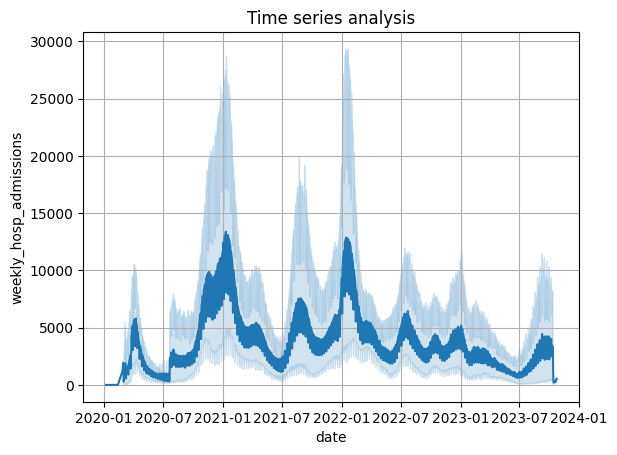

In [73]:
#Insight 9: Time-series analysis of ICU and hospital admissions (weekly trends).
sns.lineplot(data=df, x = "date", y =  "weekly_hosp_admissions" )
plt.title("Time series analysis")
plt.grid()

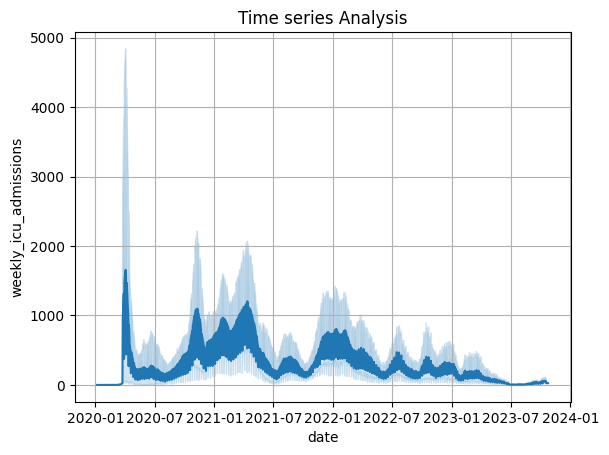

In [74]:
sns.lineplot(data =df , x = "date", y = "weekly_icu_admissions")
plt.title("Time series Analysis")
plt.grid()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 70 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    350085 non-null  object        
 1   continent                                   350085 non-null  object        
 2   location                                    350085 non-null  object        
 3   date                                        350085 non-null  datetime64[ns]
 4   total_cases                                 350085 non-null  float64       
 5   new_cases                                   340457 non-null  float64       
 6   new_cases_smoothed                          339198 non-null  float64       
 7   total_deaths                                290501 non-null  float64       
 8   new_deaths                                  340511 non-null  float64      

In [76]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

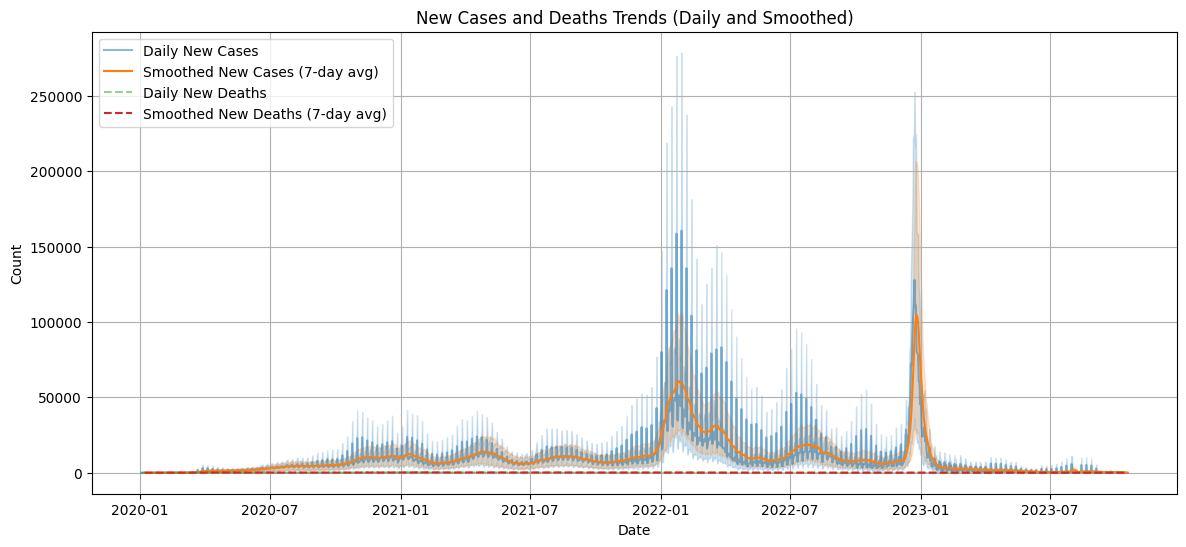

In [77]:
# insight 5
# Plot daily and smoothed new cases and deaths
plt.figure(figsize=(14, 6))

'''Daily Data: new_cases and new_deaths provide unsmoothed, day-to-day information.
Smoothed Data: new_cases_smoothed and new_deaths_smoothed offer 7-day averages, making trends clearer and reducing noise.'''

# Plot for new cases
sns.lineplot(data=df, x='date', y='new_cases', label='Daily New Cases', alpha=0.5)
sns.lineplot(data=df, x='date', y='new_cases_smoothed', label='Smoothed New Cases (7-day avg)')

# Plot for new deaths
sns.lineplot(data=df, x='date', y='new_deaths', label='Daily New Deaths', alpha=0.5, linestyle='--')
sns.lineplot(data=df, x='date', y='new_deaths_smoothed', label='Smoothed New Deaths (7-day avg)', linestyle='--')

# Customize the plot
plt.title("New Cases and Deaths Trends (Daily and Smoothed)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.show()

In [78]:
# Find the peak values
peak_new_cases = df['new_cases'].max()
peak_new_deaths = df['new_deaths'].max()
peak_new_vaccinations = df['new_vaccinations'].max()

# Find dates of peaks
peak_new_cases_date = df.loc[df['new_cases'].idxmax(), 'date']
peak_new_deaths_date = df.loc[df['new_deaths'].idxmax(), 'date']
peak_new_vaccinations_date = df.loc[df['new_vaccinations'].idxmax(), 'date']

# Display the results
print(f"Peak New Cases: {peak_new_cases:,} on {peak_new_cases_date}")
print(f"Peak New Deaths: {peak_new_deaths:,} on {peak_new_deaths_date}")
print(f"Peak New Vaccinations: {peak_new_vaccinations:,} on {peak_new_vaccinations_date}")

Peak New Cases: 8,401,961.0 on 2022-01-30 00:00:00
Peak New Deaths: 27,939.0 on 2021-01-24 00:00:00
Peak New Vaccinations: 49,672,998.0 on 2021-08-27 00:00:00


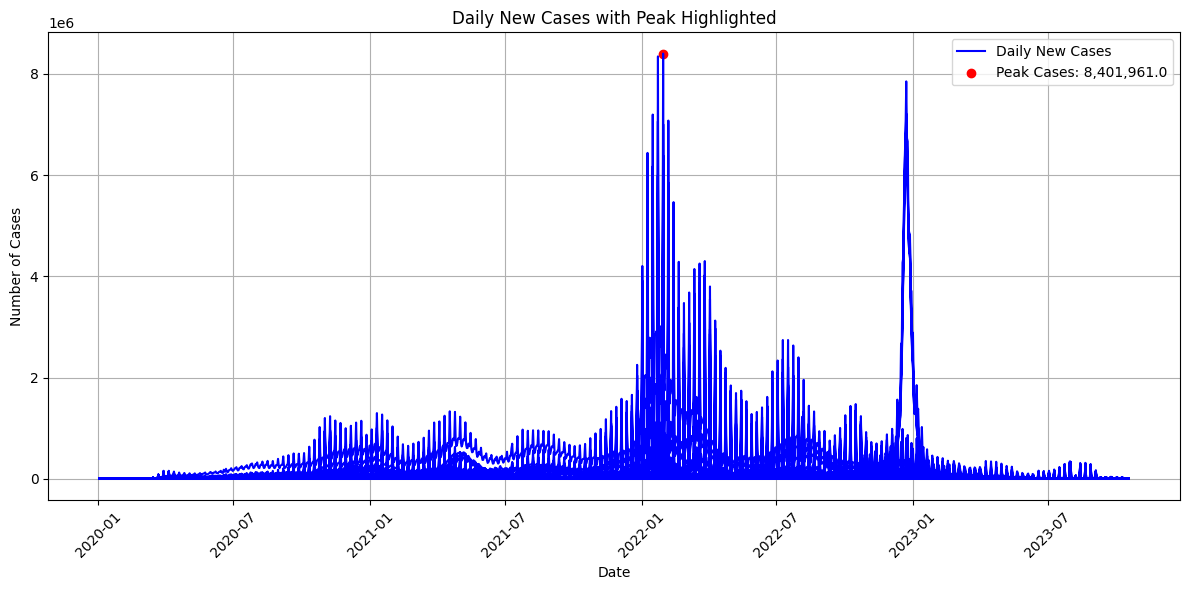

In [79]:
# Plot daily new cases and highlight the peak
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_cases'], label='Daily New Cases', color='blue')
plt.scatter(peak_new_cases_date, peak_new_cases, color='red', label=f'Peak Cases: {peak_new_cases:,}')
plt.title("Daily New Cases with Peak Highlighted")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

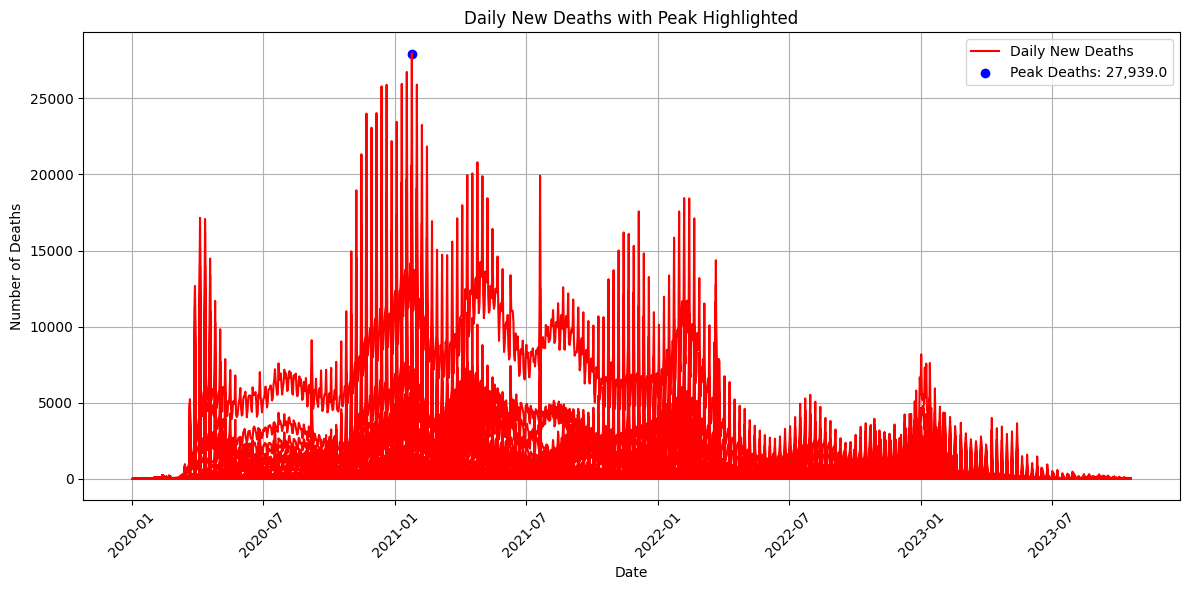

In [80]:
# Plot daily new deaths and highlight the peak
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_deaths'], label='Daily New Deaths', color='red')
plt.scatter(peak_new_deaths_date, peak_new_deaths, color='blue', label=f'Peak Deaths: {peak_new_deaths:,}')
plt.title("Daily New Deaths with Peak Highlighted")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

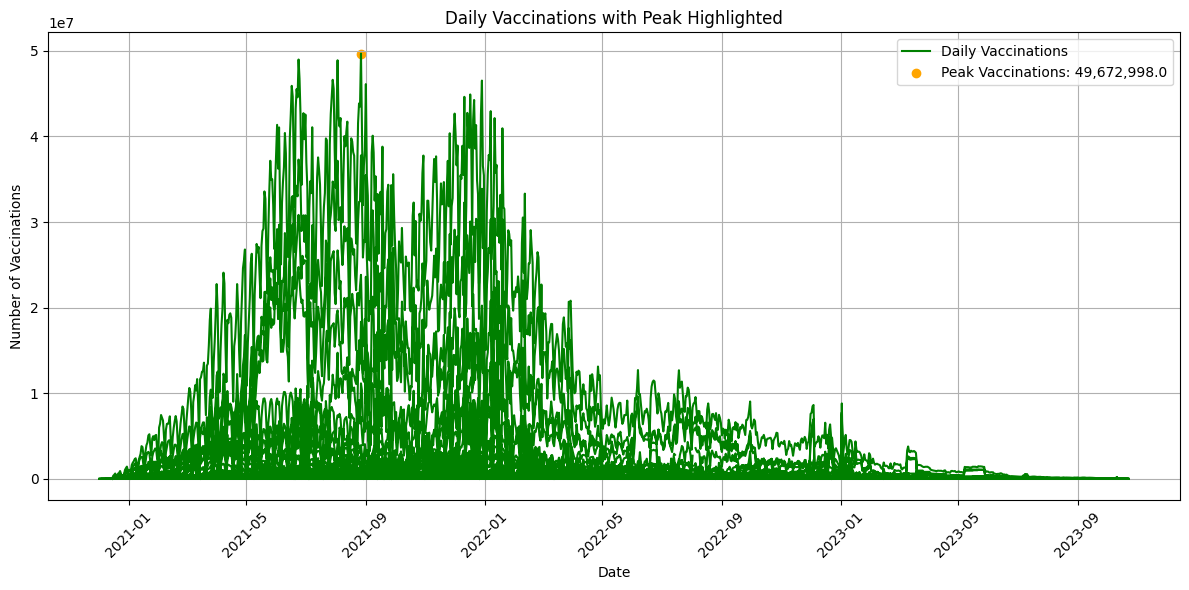

In [81]:
# Plot daily vaccinations and highlight the peak
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_vaccinations'], label='Daily Vaccinations', color='green')
plt.scatter(peak_new_vaccinations_date, peak_new_vaccinations, color='orange', label=f'Peak Vaccinations: {peak_new_vaccinations:,}')
plt.title("Daily Vaccinations with Peak Highlighted")
plt.xlabel("Date")
plt.ylabel("Number of Vaccinations")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

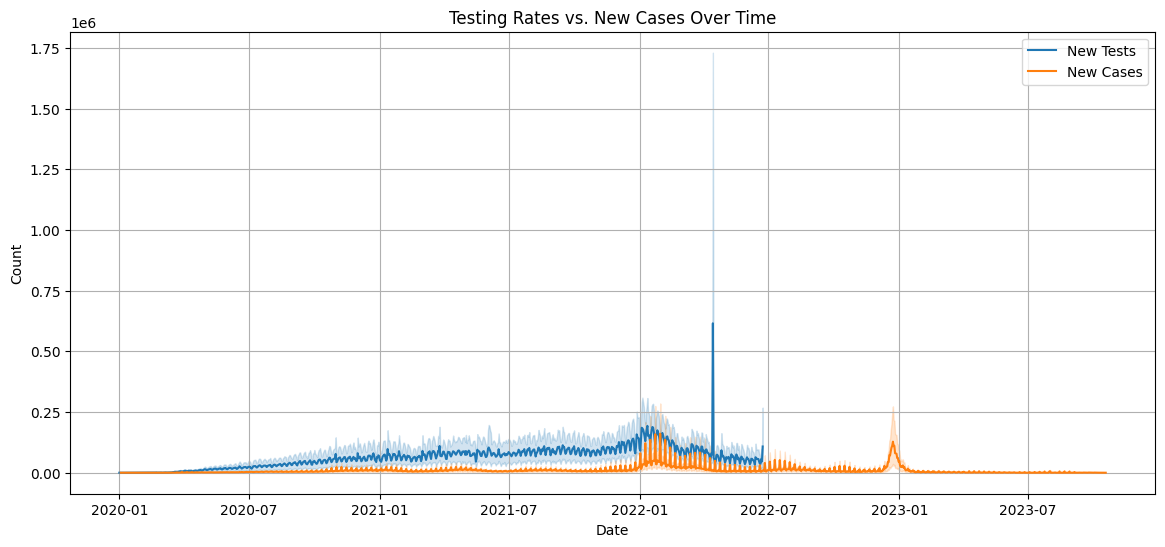

In [82]:
#Insights 10. Relationship between testing rates and new cases over time.
plt.figure(figsize=(14, 6))

# Plot new tests and new cases as time-series
sns.lineplot(data=df, x='date', y='new_tests', label='New Tests')
sns.lineplot(data=df, x='date', y='new_cases', label='New Cases')

plt.title("Testing Rates vs. New Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.show()


In [83]:
# Insight 11: Group data by continent and calculate total cases, deaths, and vaccinations
continent_summary = df.groupby('continent')[['total_cases', 'total_deaths', 'total_vaccinations']].sum()

# Display the summary
print("Comparison of Continents by Total Cases, Deaths, and Vaccinations:")
print(continent_summary)


Comparison of Continents by Total Cases, Deaths, and Vaccinations:
                total_cases  total_deaths  total_vaccinations
continent                                                    
Africa         1.604762e+12  1.923932e+10        2.961409e+13
Asia           1.660989e+11  1.320176e+09        4.077082e+12
Europe         1.643496e+11  1.754923e+09        7.066733e+11
North America  9.139941e+10  1.403034e+09        5.339635e+11
Oceania        8.081661e+09  1.462233e+07        2.526689e+10
South America  5.377088e+10  1.257349e+09        4.101038e+11


In [84]:
# Insight 12: Find the top 5 countries with highest cases and deaths per million
top_cases_per_million = df[['location', 'total_cases_per_million']].dropna().sort_values(by='total_cases_per_million', ascending=False).head(5)
top_deaths_per_million = df[['location', 'total_deaths_per_million']].dropna().sort_values(by='total_deaths_per_million', ascending=False).head(5)

# Display the results
print("Top 5 Countries by Total Cases per Million:")
print(top_cases_per_million)

print("\nTop 5 Countries by Total Deaths per Million:")
print(top_deaths_per_million)

Top 5 Countries by Total Cases per Million:
      location  total_cases_per_million
76098   Cyprus               737554.506
76127   Cyprus               737554.506
76136   Cyprus               737554.506
76135   Cyprus               737554.506
76134   Cyprus               737554.506

Top 5 Countries by Total Deaths per Million:
       location  total_deaths_per_million
245068     Peru                  6511.209
245083     Peru                  6511.209
245067     Peru                  6511.209
245069     Peru                  6511.209
245070     Peru                  6511.209


In [85]:
# Insight 13: Compare testing density across continents
testing_by_continent = df.groupby('continent')['total_tests_per_thousand'].mean().sort_values(ascending=False)

# Top 5 countries with highest testing density
top_testing_countries = df[['location', 'total_tests_per_thousand']].dropna().sort_values(by='total_tests_per_thousand', ascending=False).head(5)

# Display the results
print("Average Testing Density (Total Tests per Thousand) by Continent:")
print(testing_by_continent)

print("\nTop 5 Countries by Testing Density:")
print(top_testing_countries)

Average Testing Density (Total Tests per Thousand) by Continent:
continent
Europe           1763.828735
Asia              783.347661
Oceania           644.576075
North America     413.910418
South America     322.457283
Africa             78.121097
Name: total_tests_per_thousand, dtype: float64

Top 5 Countries by Testing Density:
      location  total_tests_per_thousand
75644   Cyprus                 32925.826
75643   Cyprus                 32850.820
75642   Cyprus                 32790.219
75641   Cyprus                 32715.521
75640   Cyprus                 32622.646


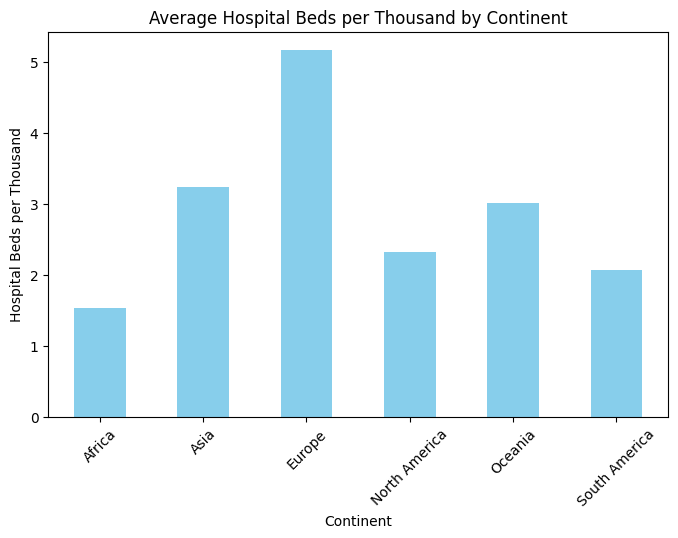

In [86]:
# Insight 14: Study the distribution of hospital beds per thousand people by continent.

hospital_beds = df.groupby('continent')['hospital_beds_per_thousand'].mean()

# Plotting
hospital_beds.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Average Hospital Beds per Thousand by Continent")
plt.ylabel("Hospital Beds per Thousand")
plt.xlabel("Continent")
plt.xticks(rotation=45)
plt.show()

Correlation between Life Expectancy and Total Cases per Million: 0.44
Correlation between Life Expectancy and Total Deaths per Million: 0.38


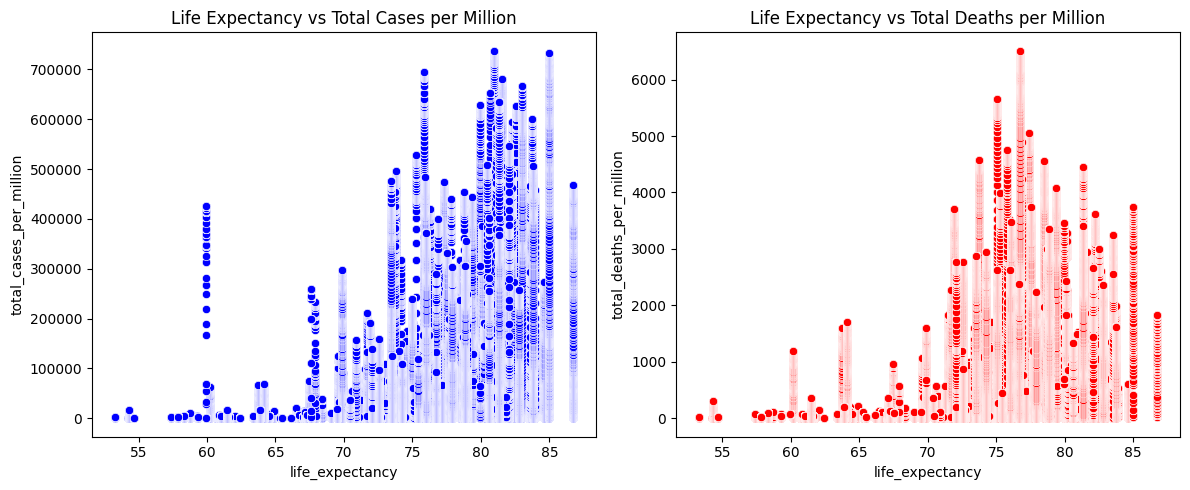

In [87]:
# Insight 15: Relationship between life expectancy and COVID-19 outcomes (cases/deaths).

# Correlation between life expectancy and COVID-19 outcomes
correlation_cases = df[['life_expectancy', 'total_cases_per_million']].corr().iloc[0, 1]
correlation_deaths = df[['life_expectancy', 'total_deaths_per_million']].corr().iloc[0, 1]

print(f"Correlation between Life Expectancy and Total Cases per Million: {correlation_cases:.2f}")
print(f"Correlation between Life Expectancy and Total Deaths per Million: {correlation_deaths:.2f}")

# Scatter plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='life_expectancy', y='total_cases_per_million', color='blue')
plt.title("Life Expectancy vs Total Cases per Million")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='life_expectancy', y='total_deaths_per_million', color='red')
plt.title("Life Expectancy vs Total Deaths per Million")

plt.tight_layout()
plt.show()


Correlation between Population Density and Total Cases per Million: 0.11


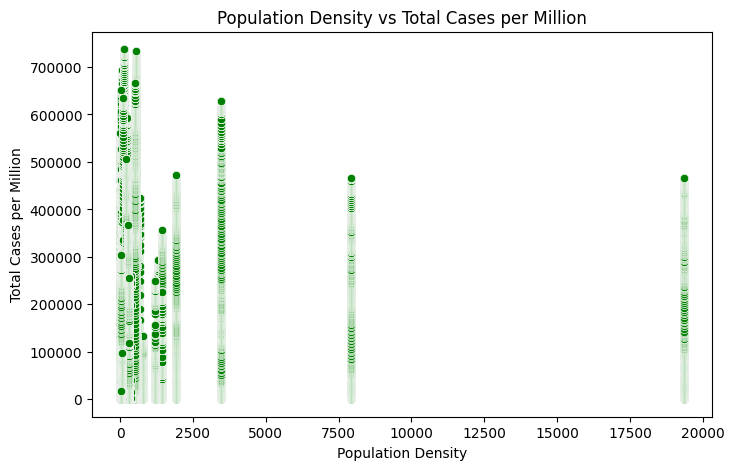

In [88]:
# Insight 23: Correlation between population density and total cases per million
correlation_density_cases = df[['population_density', 'total_cases_per_million']].corr().iloc[0, 1]
print(f"Correlation between Population Density and Total Cases per Million: {correlation_density_cases:.2f}")

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='population_density', y='total_cases_per_million', color='green')
plt.title("Population Density vs Total Cases per Million")
plt.xlabel("Population Density")
plt.ylabel("Total Cases per Million")
plt.show()


In [89]:
# Insight 39:  Top 10 countries by total cases and deaths
top_cases = df[['location', 'total_cases']].dropna().sort_values(by='total_cases', ascending=False).head(10)
top_deaths = df[['location', 'total_deaths']].dropna().sort_values(by='total_deaths', ascending=False).head(10)

# Display results
print("Top 10 Countries by Total Cases:")
print(top_cases)

print("\nTop 10 Countries by Total Deaths:")
print(top_deaths)


Top 10 Countries by Total Cases:
       location  total_cases
345923    World  771407061.0
345924    World  771407061.0
345922    World  771407061.0
345921    World  771407061.0
345920    World  771405394.0
345919    World  771404217.0
345918    World  771401265.0
345917    World  771391354.0
345916    World  771378834.0
345915    World  771351375.0

Top 10 Countries by Total Deaths:
       location  total_deaths
345924    World     6972139.0
345923    World     6972139.0
345922    World     6972139.0
345921    World     6972139.0
345920    World     6972084.0
345919    World     6972080.0
345918    World     6972045.0
345917    World     6972019.0
345916    World     6971988.0
345915    World     6971877.0


In [90]:
# Insight 40: Top 10 countries by percentage of population fully vaccinated
top_vaccinated_countries = df[['location', 'people_fully_vaccinated_per_hundred']].dropna().sort_values(by='people_fully_vaccinated_per_hundred', ascending=False).head(10)

# Display results
print("Top 10 Countries by Vaccination Rate (Fully Vaccinated %):")
print(top_vaccinated_countries)


Top 10 Countries by Vaccination Rate (Fully Vaccinated %):
         location  people_fully_vaccinated_per_hundred
117373  Gibraltar                               126.89
117134  Gibraltar                               126.76
117127  Gibraltar                               126.70
117120  Gibraltar                               126.50
117119  Gibraltar                               126.48
117118  Gibraltar                               126.47
117117  Gibraltar                               126.44
117113  Gibraltar                               126.42
117111  Gibraltar                               126.34
117107  Gibraltar                               126.22


Total Cases, Deaths, and Vaccinations by Continent:
                total_cases  total_deaths  total_vaccinations
continent                                                    
Africa         1.604762e+12  1.923932e+10        2.961409e+13
Asia           1.660989e+11  1.320176e+09        4.077082e+12
Europe         1.643496e+11  1.754923e+09        7.066733e+11
North America  9.139941e+10  1.403034e+09        5.339635e+11
Oceania        8.081661e+09  1.462233e+07        2.526689e+10
South America  5.377088e+10  1.257349e+09        4.101038e+11


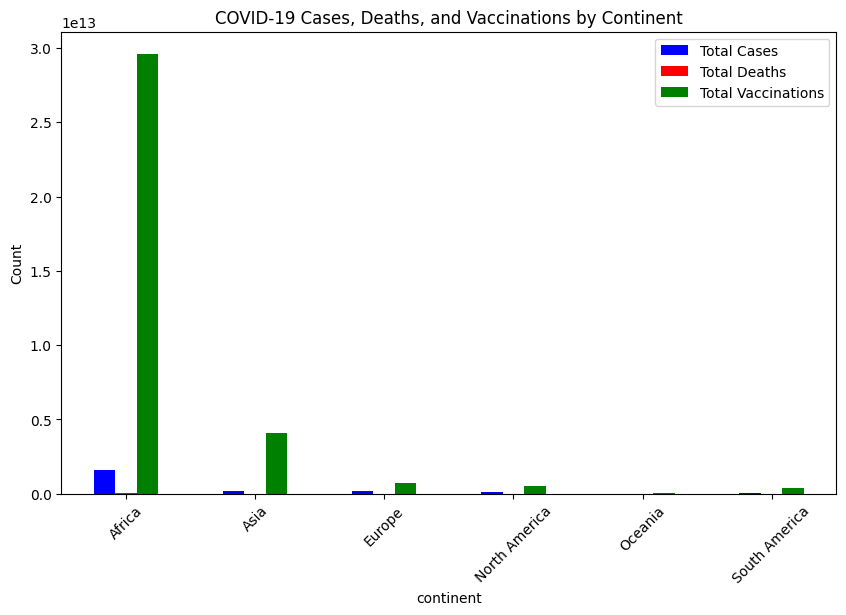

In [91]:
#Insight 41: Compare cases, deaths, and vaccination trends by continents
# Group by continent and calculate totals
continent_trends = df.groupby('continent')[['total_cases', 'total_deaths', 'total_vaccinations']].sum()

# Display results
print("Total Cases, Deaths, and Vaccinations by Continent:")
print(continent_trends)

# Plotting
continent_trends.plot(kind='bar', figsize=(10, 6), color=['blue', 'red', 'green'])
plt.title("COVID-19 Cases, Deaths, and Vaccinations by Continent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["Total Cases", "Total Deaths", "Total Vaccinations"])
plt.show()

<Figure size 1000x600 with 0 Axes>

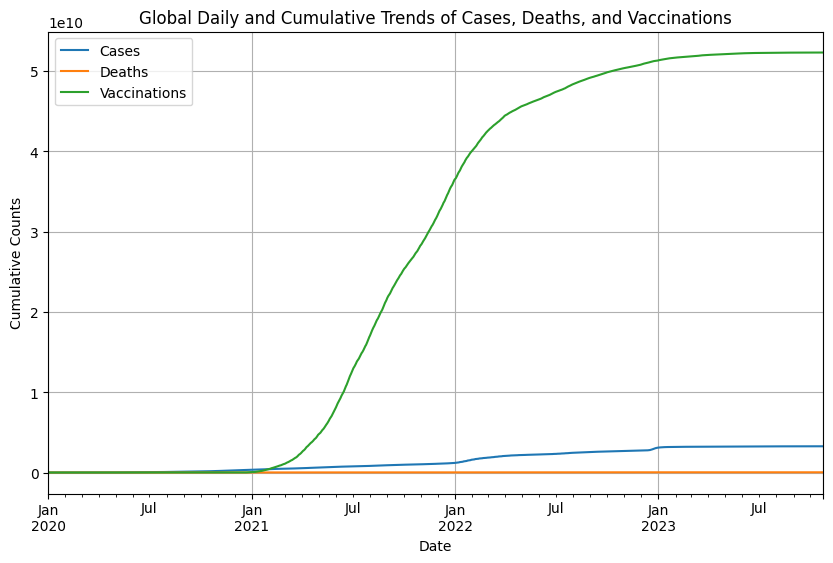

In [92]:
#Insight 43: Study daily and cumulative trends of cases, deaths, and vaccinations over time globally
# Calculate global daily and cumulative sums
global_trends = df.groupby('date')[['new_cases', 'new_deaths', 'new_vaccinations']].sum().cumsum()

# Plot the trends
plt.figure(figsize=(10, 6))
global_trends.plot(figsize=(10, 6))
plt.title("Global Daily and Cumulative Trends of Cases, Deaths, and Vaccinations")
plt.xlabel("Date")
plt.ylabel("Cumulative Counts")
plt.legend(["Cases", "Deaths", "Vaccinations"])
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

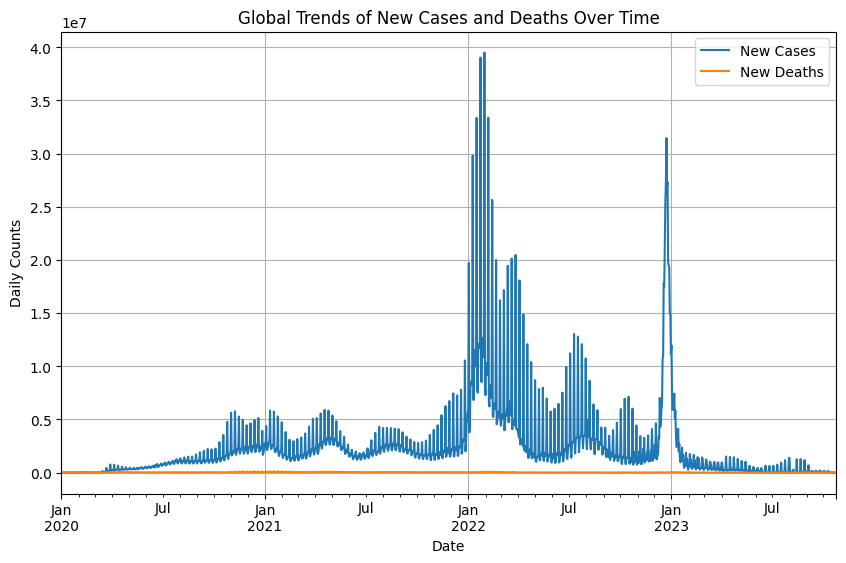

In [93]:
#Insight 44: Identify "waves" of the pandemic by analyzing new cases and deaths trends over time
# Plot new cases and deaths globally
global_new_cases_deaths = df.groupby('date')[['new_cases', 'new_deaths']].sum()

plt.figure(figsize=(10, 6))
global_new_cases_deaths.plot(figsize=(10, 6))
plt.title("Global Trends of New Cases and Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Counts")
plt.legend(["New Cases", "New Deaths"])
plt.grid(True)
plt.show()

In [94]:
#Insight 46: Compare peaks in new cases and deaths across continents
# Find peak values and their corresponding dates for new cases and deaths
continent_peaks = df.groupby('continent')[['new_cases', 'new_deaths']].max()
print("Peak New Cases and Deaths by Continent:")
print(continent_peaks)

Peak New Cases and Deaths by Continent:
               new_cases  new_deaths
continent                           
Africa         8401961.0     27939.0
Asia           6966046.0      6148.0
Europe         2417043.0      6460.0
North America  1265520.0      5061.0
Oceania         588813.0       622.0
South America   298408.0     11447.0


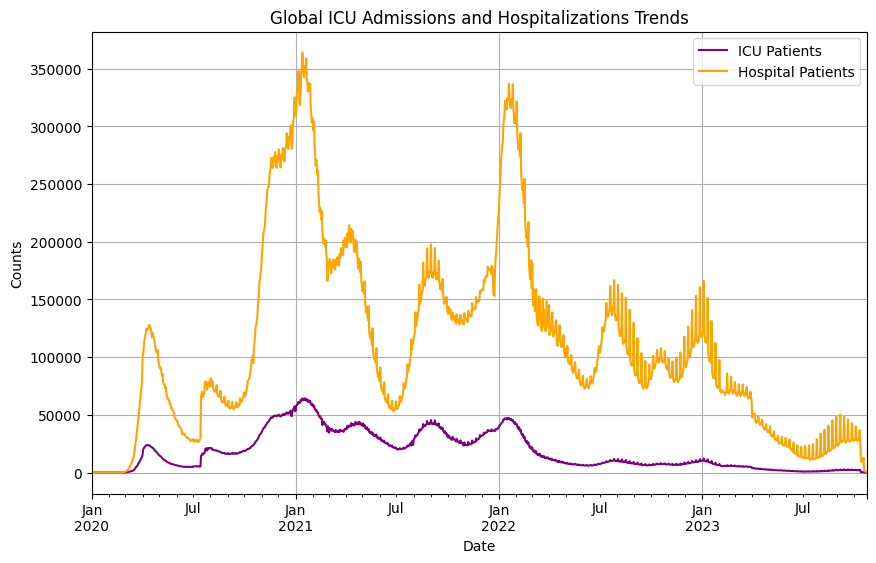

In [95]:
#Insight 47: Observe trends in ICU admissions and hospitalizations during peak periods
# Group by date and calculate global totals for ICU and hospital patients
icu_hospital_trends = df.groupby('date')[['icu_patients', 'hosp_patients']].sum()

# Plot the trends
icu_hospital_trends.plot(figsize=(10, 6), color=['purple', 'orange'])
plt.title("Global ICU Admissions and Hospitalizations Trends")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.legend(["ICU Patients", "Hospital Patients"])
plt.grid(True)
plt.show()

In [96]:
#Insight 49: Countries with disproportionately high or low death rates despite similar case numbers
# Calculate Case Fatality Rate (CFR) for each country
df['case_fatality_rate'] = (df['total_deaths'] / df['total_cases']) * 100

# Group by country to find the latest CFR and total cases
country_cfr = df.groupby('location')[['total_cases', 'case_fatality_rate']].last().dropna()

# Sort by total cases and CFR to identify disproportionate values
similar_cases = country_cfr.sort_values(by='total_cases', ascending=False)
high_cfr = similar_cases.sort_values(by='case_fatality_rate', ascending=False).head(5)
low_cfr = similar_cases.sort_values(by='case_fatality_rate', ascending=True).head(5)

print("Countries with High CFR:")
print(high_cfr)
print("\nCountries with Low CFR:")
print(low_cfr)

Countries with High CFR:
          total_cases  case_fatality_rate
location                                 
Yemen         11945.0           18.074508
Sudan         63993.0            7.885237
Syria         57423.0            5.508246
Somalia       27334.0            4.979147
Peru        4520727.0            4.904167

Countries with Low CFR:
              total_cases  case_fatality_rate
location                                     
Nauru              5393.0            0.018543
Burundi           54366.0            0.027591
Cook Islands       7168.0            0.027902
Bhutan            62697.0            0.033494
Tuvalu             2943.0            0.033979


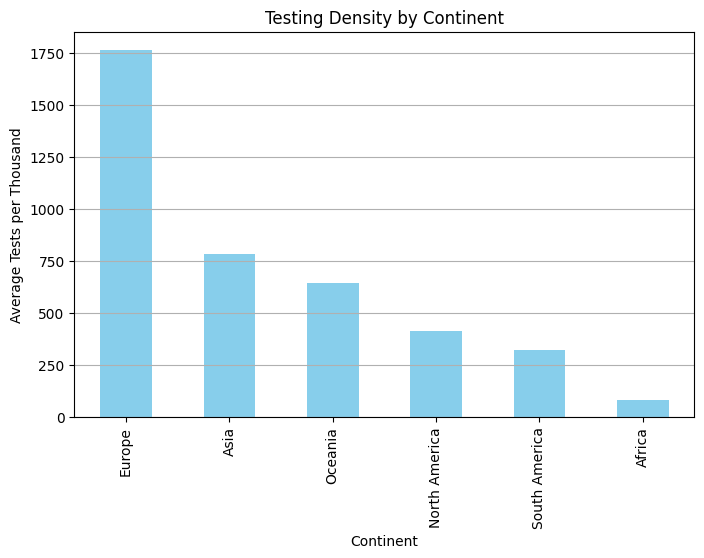

In [97]:
#Insight 50: Analyze testing density (total tests per thousand) by country and continent
# Testing density by continent
continent_testing_density = df.groupby('continent')['total_tests_per_thousand'].mean().sort_values(ascending=False)

# Plot testing density by continent
continent_testing_density.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Testing Density by Continent")
plt.xlabel("Continent")
plt.ylabel("Average Tests per Thousand")
plt.grid(axis='y')
plt.show()

In [98]:
#Insight 52: Correlation between population density and cases/deaths per million globally
# Correlation between population density and cases/deaths per million
correlation_cases = df[['population_density', 'total_cases_per_million']].corr().iloc[0, 1]
correlation_deaths = df[['population_density', 'total_deaths_per_million']].corr().iloc[0, 1]

print(f"Correlation between Population Density and Cases per Million: {correlation_cases:.2f}")
print(f"Correlation between Population Density and Deaths per Million: {correlation_deaths:.2f}")

Correlation between Population Density and Cases per Million: 0.11
Correlation between Population Density and Deaths per Million: 0.01


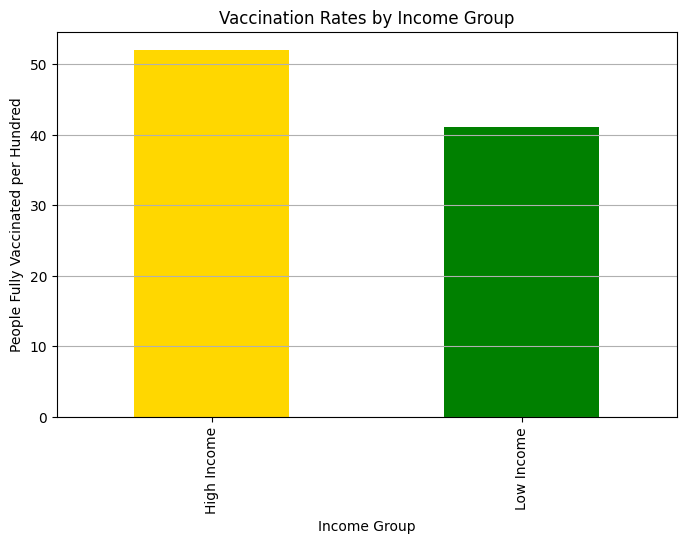

In [99]:
#Insight 54: Compare vaccination rates between high-income and low-income countries
# Categorize countries as high- or low-income based on GDP per capita
income_threshold = df['gdp_per_capita'].median()
df['income_group'] = df['gdp_per_capita'].apply(lambda x: 'High Income' if x >= income_threshold else 'Low Income')

# Calculate average vaccination rates for each income group
vaccination_by_income = df.groupby('income_group')['people_fully_vaccinated_per_hundred'].mean()

# Plot vaccination rates
vaccination_by_income.plot(kind='bar', color=['gold', 'green'], figsize=(8, 5))
plt.title("Vaccination Rates by Income Group")
plt.xlabel("Income Group")
plt.ylabel("People Fully Vaccinated per Hundred")
plt.grid(axis='y')
plt.show()

In [100]:
#Insight 57: Correlation between stringency index and vaccination rates over time
# Correlation between stringency index and vaccination rates
correlation_vaccination_stringency = df[['stringency_index', 'people_fully_vaccinated_per_hundred']].corr().iloc[0, 1]

print(f"Correlation between Stringency Index and Vaccination Rates: {correlation_vaccination_stringency:.2f}")

Correlation between Stringency Index and Vaccination Rates: -0.55


In [101]:
#Insight 59: Identify countries with the highest and lowest tests per case ratio
# Group by country to find the latest tests per case ratio
country_tests_per_case = df.groupby('location')['tests_per_case'].last().dropna()

# Top and bottom 5 countries
top_tests_per_case = country_tests_per_case.sort_values(ascending=False).head(5)
bottom_tests_per_case = country_tests_per_case.sort_values(ascending=True).head(5)

print("Top 5 Countries with Highest Tests per Case Ratio:")
print(top_tests_per_case)
print("\nBottom 5 Countries with Lowest Tests per Case Ratio:")
print(bottom_tests_per_case)

Top 5 Countries with Highest Tests per Case Ratio:
location
China               9731.820433
Marshall Islands     796.000000
Hong Kong            704.033701
Vanuatu              666.055556
Brunei               514.872928
Name: tests_per_case, dtype: float64

Bottom 5 Countries with Lowest Tests per Case Ratio:
location
Western Sahara           0.056164
Aruba                    0.071236
Cayman Islands           0.382318
Curacao                  0.512179
Sao Tome and Principe    0.781032
Name: tests_per_case, dtype: float64


In [102]:
#Insight 60: Study the effect of testing density on the detection of cases and deaths
# Correlation between testing density and cases/deaths per million
correlation_tests_cases = df[['total_tests_per_thousand', 'total_cases_per_million']].corr().iloc[0, 1]
correlation_tests_deaths = df[['total_tests_per_thousand', 'total_deaths_per_million']].corr().iloc[0, 1]

print(f"Correlation between Testing Density and Cases per Million: {correlation_tests_cases:.2f}")
print(f"Correlation between Testing Density and Deaths per Million: {correlation_tests_deaths:.2f}")

Correlation between Testing Density and Cases per Million: 0.57
Correlation between Testing Density and Deaths per Million: 0.26


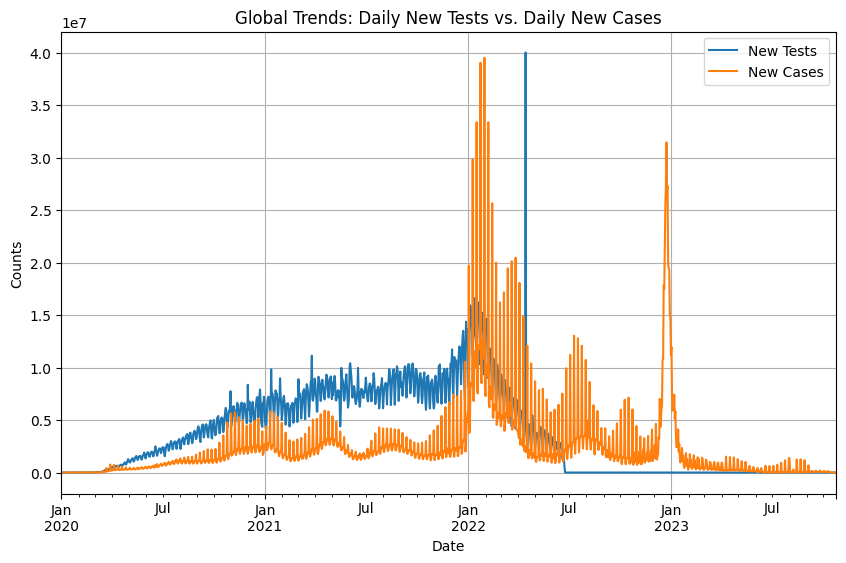

In [103]:
#Insight 61: Relationship between daily testing trends and daily new cases over time
# Group by date to calculate global totals for new tests and new cases
testing_vs_cases = df.groupby('date')[['new_tests', 'new_cases']].sum()

# Plot testing trends vs. new cases
testing_vs_cases.plot(figsize=(10, 6))
plt.title("Global Trends: Daily New Tests vs. Daily New Cases")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.legend(["New Tests", "New Cases"])
plt.grid(True)
plt.show()

In [104]:
#Insight 62: Testing strategies of countries with low death rates
# Identify countries with the lowest death rates
low_death_rate_countries = df.groupby('location')['total_deaths_per_million'].last().nsmallest(10)

# Analyze their testing strategies (tests per case)
testing_strategies = df[df['location'].isin(low_death_rate_countries.index)].groupby('location')['tests_per_case'].last()

print("Testing Strategies of Countries with Low Death Rates:")
print(testing_strategies)

Testing Strategies of Countries with Low Death Rates:
location
Benin                           22.759491
Burundi                         37.937582
Chad                            29.481816
Democratic Republic of Congo    11.462288
Niger                           28.184919
Nigeria                         20.566349
Sierra Leone                    55.781958
South Sudan                     23.196698
Tajikistan                            NaN
Tanzania                        13.585383
Name: tests_per_case, dtype: float64


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 72 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    350085 non-null  object        
 1   continent                                   350085 non-null  object        
 2   location                                    350085 non-null  object        
 3   date                                        350085 non-null  datetime64[ns]
 4   total_cases                                 350085 non-null  float64       
 5   new_cases                                   340457 non-null  float64       
 6   new_cases_smoothed                          339198 non-null  float64       
 7   total_deaths                                290501 non-null  float64       
 8   new_deaths                                  340511 non-null  float64      

# Advance Correlation Analysis

Correlation between hospital beds per thousand and case fatality rate: 0.02


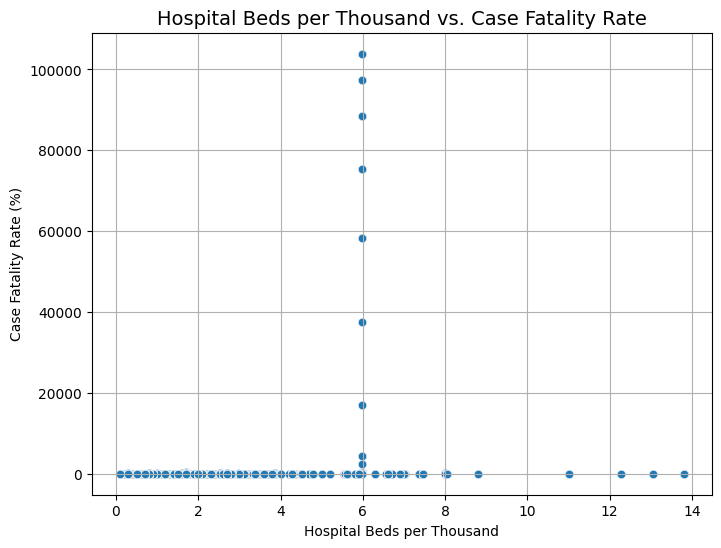

In [106]:
#Insight 16: Correlation between hospital beds per thousand and fatality rate


# Filter required columns
correlation_data = df[['hospital_beds_per_thousand', 'case_fatality_rate']].dropna()

# Calculate correlation
correlation_value = correlation_data.corr().loc['hospital_beds_per_thousand', 'case_fatality_rate']
print(f"Correlation between hospital beds per thousand and case fatality rate: {correlation_value:.2f}")

# Scatterplot for visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=correlation_data, x='hospital_beds_per_thousand', y='case_fatality_rate', alpha=0.7)
plt.title('Hospital Beds per Thousand vs. Case Fatality Rate', fontsize=14)
plt.xlabel('Hospital Beds per Thousand')
plt.ylabel('Case Fatality Rate (%)')
plt.grid(True)
plt.show()


Correlation between positive test rate and new cases detected: 0.14


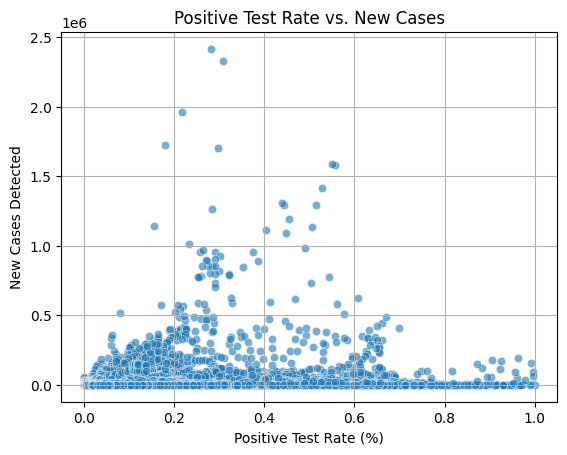

In [107]:
#Insight 19: Analyze the relationship between positive test rate and cases detected
# Filter required columns
data_insight_19 = df[['positive_rate', 'new_cases']].dropna()

# Calculate correlation
correlation_19 = data_insight_19.corr().loc['positive_rate', 'new_cases']
print(f"Correlation between positive test rate and new cases detected: {correlation_19:.2f}")

# Scatterplot for visualization
sns.scatterplot(data=data_insight_19, x='positive_rate', y='new_cases', alpha=0.6)
plt.title('Positive Test Rate vs. New Cases')
plt.xlabel('Positive Test Rate (%)')
plt.ylabel('New Cases Detected')
plt.grid(True)
plt.show()

Correlation between healthcare infrastructure (hospital beds) and vaccination rollout: 0.14


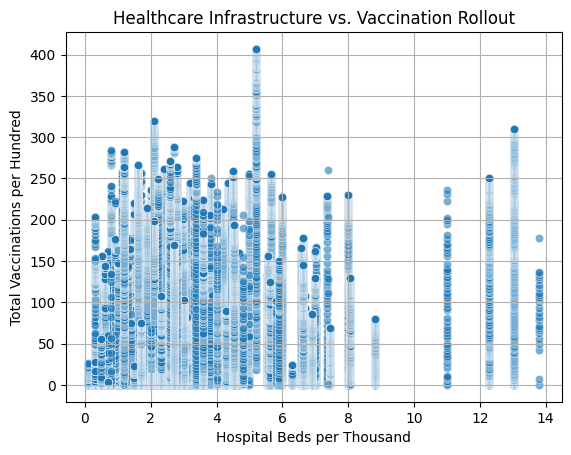

In [108]:
#Insight 20: Relationship between healthcare infrastructure and vaccination rollout

# Filter required columns
data_insight_20 = df[['hospital_beds_per_thousand', 'total_vaccinations_per_hundred']].dropna()

# Calculate correlation
correlation_20 = data_insight_20.corr().loc['hospital_beds_per_thousand', 'total_vaccinations_per_hundred']
print(f"Correlation between healthcare infrastructure (hospital beds) and vaccination rollout: {correlation_20:.2f}")

# Scatterplot for visualization
sns.scatterplot(data=data_insight_20, x='hospital_beds_per_thousand', y='total_vaccinations_per_hundred', alpha=0.6)
plt.title('Healthcare Infrastructure vs. Vaccination Rollout')
plt.xlabel('Hospital Beds per Thousand')
plt.ylabel('Total Vaccinations per Hundred')
plt.grid(True)
plt.show()



Correlation between GDP per capita and vaccination rates: 0.36


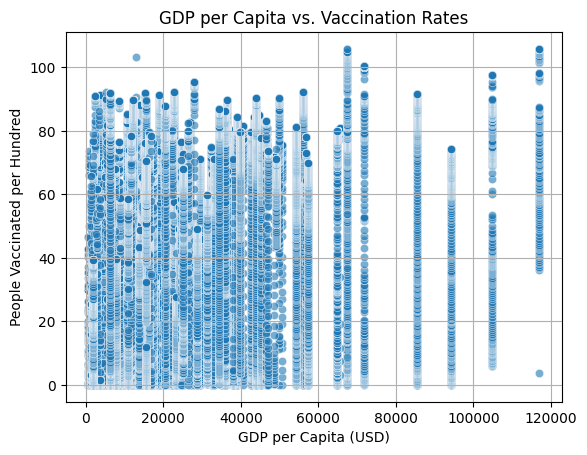

In [109]:
#Insight 21: Relationship between GDP per capita and vaccination rates
# Filter required columns
data_insight_21 = df[['gdp_per_capita', 'people_vaccinated_per_hundred']].dropna()

# Calculate correlation
correlation_21 = data_insight_21.corr().loc['gdp_per_capita', 'people_vaccinated_per_hundred']
print(f"Correlation between GDP per capita and vaccination rates: {correlation_21:.2f}")

# Scatterplot for visualization
sns.scatterplot(data=data_insight_21, x='gdp_per_capita', y='people_vaccinated_per_hundred', alpha=0.6)
plt.title('GDP per Capita vs. Vaccination Rates')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('People Vaccinated per Hundred')
plt.grid(True)
plt.show()

Correlation between extreme poverty levels and COVID-19 case rates: -0.35


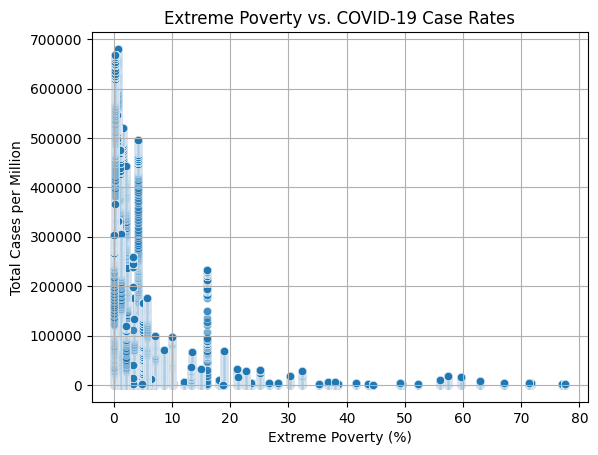

In [110]:
#Insight 22: Correlation between extreme poverty levels and COVID-19 case rates
# Filter required columns
data_insight_22 = df[['extreme_poverty', 'total_cases_per_million']].dropna()

# Calculate correlation
correlation_22 = data_insight_22.corr().loc['extreme_poverty', 'total_cases_per_million']
print(f"Correlation between extreme poverty levels and COVID-19 case rates: {correlation_22:.2f}")

# Scatterplot for visualization
sns.scatterplot(data=data_insight_22, x='extreme_poverty', y='total_cases_per_million', alpha=0.6)
plt.title('Extreme Poverty vs. COVID-19 Case Rates')
plt.xlabel('Extreme Poverty (%)')
plt.ylabel('Total Cases per Million')
plt.grid(True)
plt.show()

In [111]:
#Insight 24: Compare case and death rates across age groups (median_age, aged_65_older, aged_70_older)
# Filter required columns
data_insight_24 = df[['median_age', 'aged_65_older', 'aged_70_older',
                              'total_cases_per_million', 'total_deaths_per_million']].dropna()

# Calculate correlations with case and death rates
correlation_cases = data_insight_24.corr().loc[['median_age', 'aged_65_older', 'aged_70_older'], 'total_cases_per_million']
correlation_deaths = data_insight_24.corr().loc[['median_age', 'aged_65_older', 'aged_70_older'], 'total_deaths_per_million']

# Print results
print("Correlation of age groups with case rates:")
print(correlation_cases)
print("\nCorrelation of age groups with death rates:")
print(correlation_deaths)

Correlation of age groups with case rates:
median_age       0.492240
aged_65_older    0.469746
aged_70_older    0.472043
Name: total_cases_per_million, dtype: float64

Correlation of age groups with death rates:
median_age       0.491503
aged_65_older    0.481656
aged_70_older    0.481231
Name: total_deaths_per_million, dtype: float64


In [112]:
#Insight 25: Study the role of smoking prevalence (male and female) in COVID-19 mortality
# Filter required columns
data_insight_25 = df[['male_smokers', 'female_smokers', 'total_deaths_per_million']].dropna()

# Calculate correlations
correlation_smoking = data_insight_25.corr().loc[['male_smokers', 'female_smokers'], 'total_deaths_per_million']

# Print results
print("Correlation of smoking prevalence with COVID-19 mortality:")
print(correlation_smoking)

Correlation of smoking prevalence with COVID-19 mortality:
male_smokers      0.125095
female_smokers    0.496835
Name: total_deaths_per_million, dtype: float64


In [113]:
#Insight 26: Correlation between stringency index and new case trends
# Filter required columns
data_insight_26 = df[['stringency_index', 'new_cases_smoothed_per_million']].dropna()

# Calculate correlation
correlation_stringency_cases = data_insight_26['stringency_index'].corr(data_insight_26['new_cases_smoothed_per_million'])

# Print result
print("Correlation between stringency index and new case trends:")
print(correlation_stringency_cases)


Correlation between stringency index and new case trends:
-0.014077236088841101


In [114]:
#Insight 27: Countries with the strictest policies and their impact on cases and deaths
# Filter required columns
data_insight_27 = df[['location', 'stringency_index', 'total_cases_per_million', 'total_deaths_per_million']].dropna()

# Get countries with the top 10 strictest policies (highest average stringency index)
strictest_policies = data_insight_27.groupby('location')['stringency_index'].mean().nlargest(10).index

# Impact on cases and deaths
impact_cases_deaths = data_insight_27[data_insight_27['location'].isin(strictest_policies)].groupby('location')[['total_cases_per_million', 'total_deaths_per_million']].mean()

# Print results
print("Impact of strictest policies on cases and deaths:")
print(impact_cases_deaths)

Impact of strictest policies on cases and deaths:
             total_cases_per_million  total_deaths_per_million
location                                                      
Azerbaijan              41370.222177                527.042310
China                    1550.026735                  6.820021
Honduras                25631.703029                660.876778
India                   17949.433144                226.235141
Iran                    44203.937338                979.578658
Iraq                    31367.408116                379.117520
Libya                   40120.287764                545.909898
Myanmar                  6081.297201                194.701299
Philippines             16296.689353                267.322414
Zimbabwe                 7380.583044                185.270930


In [115]:
#Insight 28: Relationship between vaccination rates and stringency index over time
# Filter required columns
data_insight_28 = df[['date', 'location', 'stringency_index', 'people_fully_vaccinated_per_hundred']].dropna()

# Correlation over time (globally)
vaccination_stringency_correlation = data_insight_28.groupby('date')[['stringency_index', 'people_fully_vaccinated_per_hundred']].corr().iloc[0::2, -1].reset_index(drop=True)

# Print result
print("Relationship between vaccination rates and stringency index over time (correlation):")
print(vaccination_stringency_correlation.mean())  # Average correlation


Relationship between vaccination rates and stringency index over time (correlation):
-0.05731910103575061


In [116]:
#Insight 33: Relationship between reproduction rate and total tests conducted
# Filter required columns
data_insight_33 = df[['reproduction_rate', 'total_tests_per_thousand']].dropna()

# Calculate correlation
correlation_33 = data_insight_33.corr().loc['reproduction_rate', 'total_tests_per_thousand']
print(f"Correlation between reproduction rate and total tests conducted (per thousand): {correlation_33:.2f}")

Correlation between reproduction rate and total tests conducted (per thousand): -0.02


In [117]:
#Insight 63: Study the correlation between hospital beds per thousand and deaths per million
# Filter required columns
data_insight_63 = df[['hospital_beds_per_thousand', 'total_deaths_per_million']].dropna()

# Calculate correlation
correlation_63 = data_insight_63.corr().loc['hospital_beds_per_thousand', 'total_deaths_per_million']
print(f"Correlation between hospital beds per thousand and deaths per million: {correlation_63:.2f}")

Correlation between hospital beds per thousand and deaths per million: 0.28


In [118]:
#Insight 64: Compare ICU and hospital admissions in countries with high and low death rates
# Define threshold for high and low death rates
high_death_rate_threshold = df['total_deaths_per_million'].quantile(0.75)
low_death_rate_threshold = df['total_deaths_per_million'].quantile(0.25)

# Separate data into high and low death rate groups
high_death_rate = df[df['total_deaths_per_million'] > high_death_rate_threshold]
low_death_rate = df[df['total_deaths_per_million'] <= low_death_rate_threshold]

# Calculate mean ICU and hospital admissions for each group
high_death_admissions = high_death_rate[['icu_patients', 'hosp_patients']].mean()
low_death_admissions = low_death_rate[['icu_patients', 'hosp_patients']].mean()

# Print results
print("Average ICU and hospital admissions (High death rate countries):")
print(high_death_admissions)
print("\nAverage ICU and hospital admissions (Low death rate countries):")
print(low_death_admissions)

Average ICU and hospital admissions (High death rate countries):
icu_patients      918.330883
hosp_patients    5335.535800
dtype: float64

Average ICU and hospital admissions (Low death rate countries):
icu_patients     135.056759
hosp_patients    745.466403
dtype: float64


In [119]:
#Insight 66: Analyze the effect of life expectancy on recovery rates and fatalities
# Filter required columns
data_insight_66 = df[['life_expectancy', 'total_cases_per_million', 'total_deaths_per_million']].dropna()

# Calculate correlation
correlation_life_cases = data_insight_66.corr().loc['life_expectancy', 'total_cases_per_million']
correlation_life_deaths = data_insight_66.corr().loc['life_expectancy', 'total_deaths_per_million']

# Print results
print(f"Correlation between life expectancy and case rates: {correlation_life_cases:.2f}")
print(f"Correlation between life expectancy and death rates: {correlation_life_deaths:.2f}")

Correlation between life expectancy and case rates: 0.46
Correlation between life expectancy and death rates: 0.38


In [120]:
#Insight 67: Correlation between healthcare infrastructure and vaccination coverage
# Filter required columns
data_insight_67 = df[['hospital_beds_per_thousand', 'total_vaccinations_per_hundred']].dropna()

# Calculate correlation
correlation_67 = data_insight_67.corr().loc['hospital_beds_per_thousand', 'total_vaccinations_per_hundred']
print(f"Correlation between healthcare infrastructure and vaccination coverage: {correlation_67:.2f}")


Correlation between healthcare infrastructure and vaccination coverage: 0.14


In [121]:
#Insight 68: Relationship between the stringency index and the growth of new cases and deaths
# Filter required columns
data_insight_68 = df[['stringency_index', 'new_cases', 'new_deaths']].dropna()

# Calculate correlation
correlation_stringency_cases = data_insight_68.corr().loc['stringency_index', 'new_cases']
correlation_stringency_deaths = data_insight_68.corr().loc['stringency_index', 'new_deaths']

# Print results
print(f"Correlation between stringency index and new case growth: {correlation_stringency_cases:.2f}")
print(f"Correlation between stringency index and new death growth: {correlation_stringency_deaths:.2f}")

Correlation between stringency index and new case growth: 0.02
Correlation between stringency index and new death growth: 0.14


In [122]:
#Insight 69: Identify countries with early stringent measures and their long-term impacts
# Filter countries with high stringency index early in the pandemic (e.g., first 3 months)
early_stringent = df[df['date'] < '2020-06-01'].groupby('location')['stringency_index'].mean()
top_countries = early_stringent.nlargest(10).index

# Analyze long-term impacts (e.g., total deaths per million)
long_term_impacts = df[df['location'].isin(top_countries)].groupby('location')['total_deaths_per_million'].mean()

# Print results
print("Long-term impacts (Total deaths per million) for countries with early stringent measures:")
print(long_term_impacts)

Long-term impacts (Total deaths per million) for countries with early stringent measures:
location
China            22.952028
El Salvador     467.535212
Georgia        2775.553852
Guatemala       721.653187
Hong Kong              NaN
Iraq            421.195081
Italy          2162.150263
Mongolia        472.298182
Palestine       746.928928
Philippines     333.237316
Name: total_deaths_per_million, dtype: float64


In [123]:
#Insight 70: Countries with low stringency but high vaccination rates – were they successful?
# Filter countries with low stringency and high vaccination rates
low_stringency = df.groupby('location')['stringency_index'].mean().nsmallest(10).index
high_vaccination = df.groupby('location')['total_vaccinations_per_hundred'].mean().nlargest(10).index

# Intersection of both groups
successful_countries = set(low_stringency).intersection(high_vaccination)

# Analyze their total cases and deaths per million
success_analysis = df[df['location'].isin(successful_countries)].groupby('location')[['total_cases_per_million', 'total_deaths_per_million']].mean()

# Print results
print("Analysis of countries with low stringency and high vaccination rates:")
print(success_analysis)

Analysis of countries with low stringency and high vaccination rates:
Empty DataFrame
Columns: [total_cases_per_million, total_deaths_per_million]
Index: []


In [124]:
#Insight 72: Correlation between stringency index and ICU/hospital admissions
# Filter the required columns
data_insight_72 = df[['stringency_index', 'icu_patients', 'hosp_patients']].dropna()

# Calculate correlations
correlation_stringency_icu = data_insight_72.corr().loc['stringency_index', 'icu_patients']
correlation_stringency_hosp = data_insight_72.corr().loc['stringency_index', 'hosp_patients']

# Print results
print(f"Correlation between stringency index and ICU admissions: {correlation_stringency_icu:.2f}")
print(f"Correlation between stringency index and hospital admissions: {correlation_stringency_hosp:.2f}")

Correlation between stringency index and ICU admissions: 0.17
Correlation between stringency index and hospital admissions: 0.15


In [125]:
#Insight 73: Study the impact of median_age on cases and death rates
# Filter the required columns
data_insight_73 = df[['median_age', 'total_cases_per_million', 'total_deaths_per_million']].dropna()

# Calculate correlations
correlation_median_age_cases = data_insight_73.corr().loc['median_age', 'total_cases_per_million']
correlation_median_age_deaths = data_insight_73.corr().loc['median_age', 'total_deaths_per_million']

# Print results
print(f"Correlation between median age and case rates: {correlation_median_age_cases:.2f}")
print(f"Correlation between median age and death rates: {correlation_median_age_deaths:.2f}")

Correlation between median age and case rates: 0.49
Correlation between median age and death rates: 0.49


In [126]:
#Insight 74: Compare countries with higher proportions of aged_65_older and aged_70_older to their fatality rates
# Filter the required columns
data_insight_74 = df[['aged_65_older', 'aged_70_older', 'total_deaths_per_million']].dropna()

# Calculate correlations
correlation_aged_65_deaths = data_insight_74.corr().loc['aged_65_older', 'total_deaths_per_million']
correlation_aged_70_deaths = data_insight_74.corr().loc['aged_70_older', 'total_deaths_per_million']

# Print results
print(f"Correlation between aged 65+ and death rates: {correlation_aged_65_deaths:.2f}")
print(f"Correlation between aged 70+ and death rates: {correlation_aged_70_deaths:.2f}")

Correlation between aged 65+ and death rates: 0.48
Correlation between aged 70+ and death rates: 0.48


In [127]:
#Insight 75: Analyze the role of smoking prevalence (male and female) in death rates
# Filter the required columns
data_insight_75 = df[['male_smokers', 'female_smokers', 'total_deaths_per_million']].dropna()

# Calculate correlations
correlation_male_smokers_deaths = data_insight_75.corr().loc['male_smokers', 'total_deaths_per_million']
correlation_female_smokers_deaths = data_insight_75.corr().loc['female_smokers', 'total_deaths_per_million']

# Print results
print(f"Correlation between male smokers and death rates: {correlation_male_smokers_deaths:.2f}")
print(f"Correlation between female smokers and death rates: {correlation_female_smokers_deaths:.2f}")

Correlation between male smokers and death rates: 0.13
Correlation between female smokers and death rates: 0.50


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 72 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    350085 non-null  object        
 1   continent                                   350085 non-null  object        
 2   location                                    350085 non-null  object        
 3   date                                        350085 non-null  datetime64[ns]
 4   total_cases                                 350085 non-null  float64       
 5   new_cases                                   340457 non-null  float64       
 6   new_cases_smoothed                          339198 non-null  float64       
 7   total_deaths                                290501 non-null  float64       
 8   new_deaths                                  340511 non-null  float64      

# Model Training and Evaluation

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 72 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    350085 non-null  object        
 1   continent                                   350085 non-null  object        
 2   location                                    350085 non-null  object        
 3   date                                        350085 non-null  datetime64[ns]
 4   total_cases                                 350085 non-null  float64       
 5   new_cases                                   340457 non-null  float64       
 6   new_cases_smoothed                          339198 non-null  float64       
 7   total_deaths                                290501 non-null  float64       
 8   new_deaths                                  340511 non-null  float64      

# Model Building and Training

In [168]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Forecasting future total cases**

In [135]:
# Handle missing values
# Impute missing values with median for numerical columns
imputer = SimpleImputer(strategy='median')
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Select features for prediction
features = [
    'new_cases', 'new_deaths', 'new_vaccinations', 'stringency_index',
    'population_density', 'median_age', 'gdp_per_capita', 'human_development_index'
]
target = 'total_cases'

# Drop rows where target is missing
df = df.dropna(subset=[target])

# Prepare feature and target variables
X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [137]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [138]:
# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [156]:
# Select features for prediction
features = [
    'new_cases', 'new_deaths', 'new_vaccinations', 'stringency_index',
    'population_density', 'median_age', 'gdp_per_capita', 'human_development_index'
]
target = 'total_vaccinations'
# Drop rows where target is missing
df = df.dropna(subset=[target])

# Prepare feature and target variables
X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Evaluation for total cases

In [140]:
# Predict on test set
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [141]:
# Evaluate Linear Regression
linear_mse = mean_squared_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)

# Print results
print("Linear Regression:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R² Score: {linear_r2}")

Linear Regression:
Mean Squared Error: 1352386538080075.2
R² Score: 0.16084199144623934


In [142]:
# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R² Score: {rf_r2}")


Random Forest Regressor:
Mean Squared Error: 140049480848279.22
R² Score: 0.9130990732764367


<ipython-input-143-60e1ca8c5d00>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')


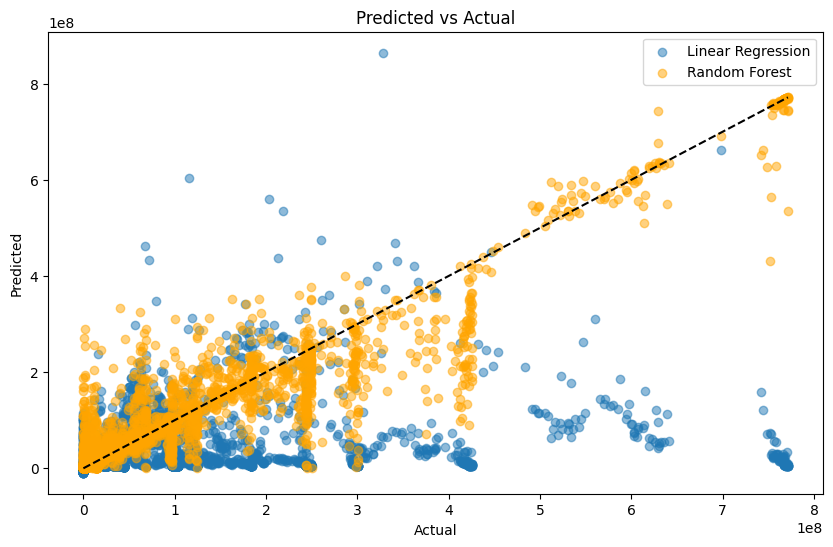

In [143]:
# Visualize Linear Regression Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_preds, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, rf_preds, alpha=0.5, label='Random Forest', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()


In [144]:
# Example: Predicting for future values
future_data = pd.DataFrame({
    'new_cases': [5000], 'new_deaths': [50], 'new_vaccinations': [10000],
    'stringency_index': [70], 'population_density': [150], 'median_age': [40],
    'gdp_per_capita': [35000], 'human_development_index': [0.9]
})

future_prediction_linear = linear_model.predict(future_data)
future_prediction_rf = rf_model.predict(future_data)

print("Future Prediction (Linear Regression):", future_prediction_linear)
print("Future Prediction (Random Forest):", future_prediction_rf)

Future Prediction (Linear Regression): [5180435.71180542]
Future Prediction (Random Forest): [695902.81]


## **Forecasting future total deaths**

In [146]:
# Select features for prediction
features = [
    'new_cases', 'new_deaths', 'new_vaccinations', 'stringency_index',
    'population_density', 'median_age', 'gdp_per_capita', 'human_development_index'
]
target = 'total_deaths'

# Drop rows where target is missing
df = df.dropna(subset=[target])

# Prepare feature and target variables
X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [148]:
# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Evaluate total deaths**

In [150]:
# Predict on test set
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate Linear Regression
linear_mse = mean_squared_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)

# Print results
print("Linear Regression:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R² Score: {linear_r2}")


Linear Regression:
Mean Squared Error: 117354004941.76074
R² Score: 0.31145242476971735


In [151]:
# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R² Score: {rf_r2}")


Random Forest Regressor:
Mean Squared Error: 8377572185.60458
R² Score: 0.9508465261362204


<ipython-input-152-60e1ca8c5d00>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')


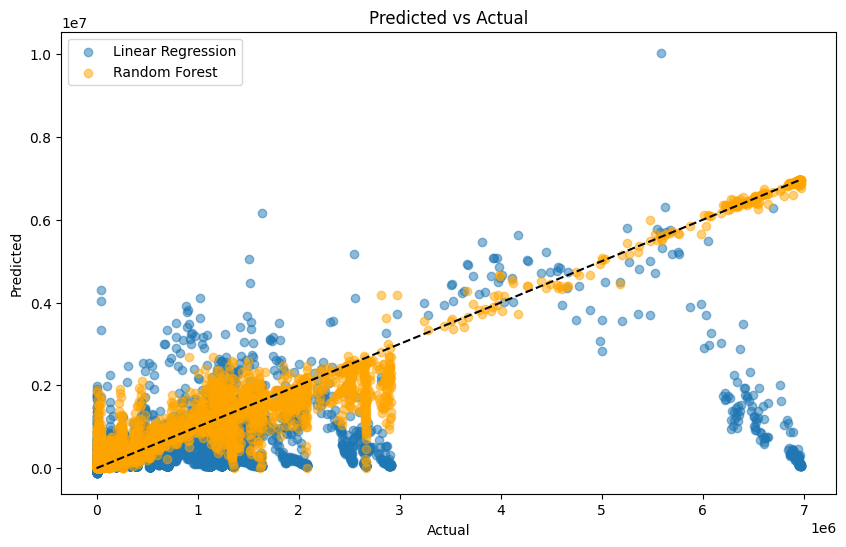

In [152]:
# Visualize Linear Regression Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_preds, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, rf_preds, alpha=0.5, label='Random Forest', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()

# Predicting for future values

In [153]:
future_data = pd.DataFrame({
    'new_cases': [5000], 'new_deaths': [50], 'new_vaccinations': [10000],
    'stringency_index': [70], 'population_density': [150], 'median_age': [40],
    'gdp_per_capita': [35000], 'human_development_index': [0.9]
})

future_prediction_linear = linear_model.predict(future_data)
future_prediction_rf = rf_model.predict(future_data)

print("Future Prediction (Linear Regression):", future_prediction_linear)
print("Future Prediction (Random Forest):", future_prediction_rf)


Future Prediction (Linear Regression): [52307.38235897]
Future Prediction (Random Forest): [15352.11]


## **Forecasting Future total_vaccinations**

In [157]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [158]:
# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluate Total vaccinations

In [162]:
# Predict on test set
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate Linear Regression
linear_mse = mean_squared_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)

# Print results
print("Linear Regression:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R² Score: {linear_r2}")



Linear Regression:
Mean Squared Error: 4.819947248736044e+17
R² Score: 0.2300359343157372


In [163]:
# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R² Score: {rf_r2}")


Random Forest Regressor:
Mean Squared Error: 8.547385160312958e+16
R² Score: 0.8634595133643899


<ipython-input-164-60e1ca8c5d00>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')


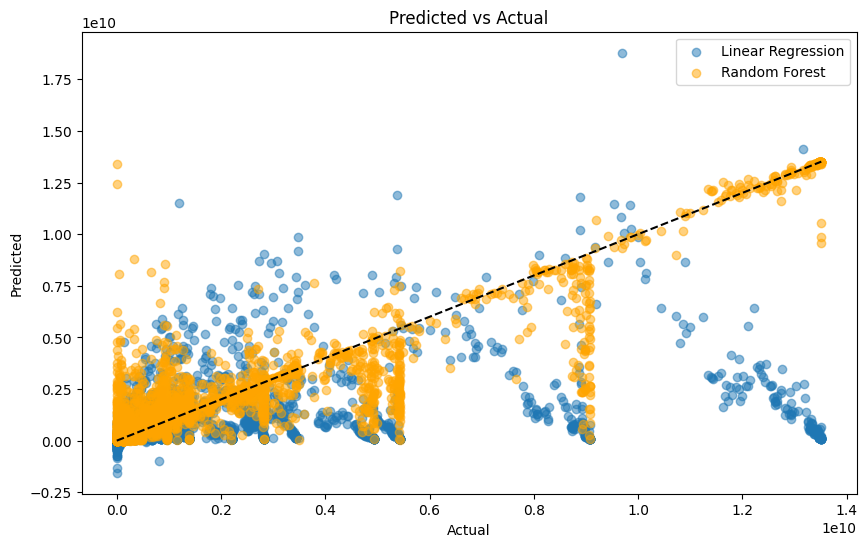

In [164]:
# Visualize Linear Regression Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_preds, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, rf_preds, alpha=0.5, label='Random Forest', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.legend()
plt.show()


# Predicting for future values

In [165]:

future_data = pd.DataFrame({
    'new_cases': [5000], 'new_deaths': [50], 'new_vaccinations': [10000],
    'stringency_index': [70], 'population_density': [150], 'median_age': [40],
    'gdp_per_capita': [35000], 'human_development_index': [0.9]
})

future_prediction_linear = linear_model.predict(future_data)
future_prediction_rf = rf_model.predict(future_data)

print("Future Prediction (Linear Regression):", future_prediction_linear)
print("Future Prediction (Random Forest):", future_prediction_rf)

Future Prediction (Linear Regression): [77158909.02281235]
Future Prediction (Random Forest): [1131083.78]



# **Prediction of COVID-19 Trends Using Machine Learning Models**

## **1. Introduction**
The COVID-19 pandemic has profoundly impacted the world, necessitating the development of tools for forecasting cases, deaths, and vaccinations. This project aims to predict future trends in **total cases**, **total deaths**, and **total vaccinations** using machine learning techniques applied to the **Our World in Data (OWID) COVID-19 dataset**. By leveraging historical data, we aim to provide insights into the pandemic's progression to support informed decision-making.

---

## **2. Dataset Overview**
The dataset used for this project is the **OWID COVID-19 dataset**, which contains country-level data on COVID-19 cases, deaths, vaccinations, and related metrics. The dataset spans 350,085 entries and 67 features, including:
- **Epidemiological Data**: Total cases, new cases, total deaths, new deaths, etc.
- **Vaccination Data**: Total vaccinations, people vaccinated, new vaccinations, etc.
- **Demographic and Socioeconomic Data**: Population density, median age, GDP per capita, and human development index (HDI).
- **Health Infrastructure**: Hospital beds per thousand, ICU admissions, and stringency index.

---

## **3. Objective**
The primary goal of this project is to predict:
1. **Total COVID-19 Cases**
2. **Total Deaths**
3. **Total Vaccinations**

Using two machine learning models:
- **Linear Regression** (for baseline comparisons)
- **Random Forest Regressor** (for improved accuracy).

---

## **4. Methodology**

### **4.1 Data Preprocessing**
To prepare the dataset for modeling:
- **Handling Missing Values**: Imputed missing numerical values using the median strategy.
- **Feature Selection**: Selected relevant features based on domain knowledge:
  - New cases, new deaths, new vaccinations, stringency index, population density, median age, GDP per capita, and HDI.
- **Target Variables**:
  - Total cases, total deaths, and total vaccinations.
- **Train-Test Split**: Data was split into 80% training and 20% testing sets.

### **4.2 Model Training**
Two models were trained for each target variable:
1. **Linear Regression**: A simple, interpretable baseline model.
2. **Random Forest Regressor**: A non-linear ensemble method to capture complex relationships in the data.

### **4.3 Evaluation Metrics**
The models were evaluated using:
- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
- **R² Score**: Represents the proportion of variance in the target variable explained by the model.

---

## **5. Results**

### **5.1 Total Cases**
| Model                  | MSE               | R² Score   |
|------------------------|-------------------|------------|
| Linear Regression      | 1.35e+15          | 0.1608     |
| Random Forest Regressor| 1.40e+14          | 0.9131     |

**Future Predictions**:
- Linear Regression: **5,180,435**
- Random Forest: **695,903**

### **5.2 Total Deaths**
| Model                  | MSE               | R² Score   |
|------------------------|-------------------|------------|
| Linear Regression      | 1.17e+11          | 0.3115     |
| Random Forest Regressor| 8.38e+9           | 0.9508     |

**Future Predictions**:
- Linear Regression: **52,307**
- Random Forest: **15,352**

### **5.3 Total Vaccinations**
| Model                  | MSE               | R² Score   |
|------------------------|-------------------|------------|
| Linear Regression      | 4.82e+17          | 0.2300     |
| Random Forest Regressor| 8.55e+16          | 0.8635     |

**Future Predictions**:
- Linear Regression: **77,158,909**
- Random Forest: **1,131,084**

---

## **6. Discussion**
The results highlight the superiority of the **Random Forest Regressor** for all three prediction tasks:
- For **total cases**, Random Forest achieved an **R² score of 91.31%**, compared to 16.08% for Linear Regression.
- For **total deaths**, Random Forest performed exceptionally well with an **R² score of 95.08%**, suggesting a highly accurate model.
- For **total vaccinations**, Random Forest achieved an **R² score of 86.35%**, significantly outperforming Linear Regression.

Linear Regression consistently underperformed due to its inability to model non-linear relationships inherent in the data.

---

## **7. Limitations**
- The predictions rely heavily on historical trends and do not account for future policy changes, vaccine rollout rates, or emerging variants of the virus.
- Missing data for features like ICU admissions and testing rates could limit model performance.
- Predictions for countries with limited historical data may be less reliable.

---

## **8. Conclusion**
This project demonstrates the application of machine learning techniques to predict COVID-19 trends using the OWID dataset. **Random Forest Regressor** proved to be a robust model, accurately capturing the complex relationships in the data.

### **Key Findings**:
1. Random Forest consistently outperformed Linear Regression for all tasks.
2. The model can provide reasonable future predictions for total cases, deaths, and vaccinations.

---

## **9. Future Work**
To further improve the project:
- Incorporate lagged features (e.g., past 7-day averages of cases and deaths).
- Use advanced models like **XGBoost**, **Gradient Boosting**, or **LSTMs** for time-series forecasting.
- Fine-tune hyperparameters to further optimize Random Forest performance.

---

### **10. References**
1. Our World in Data COVID-19 Dataset: [https://ourworldindata.org/coronavirus](https://ourworldindata.org/coronavirus)
2. Scikit-learn Documentation: [https://scikit-learn.org](https://scikit-learn.org)